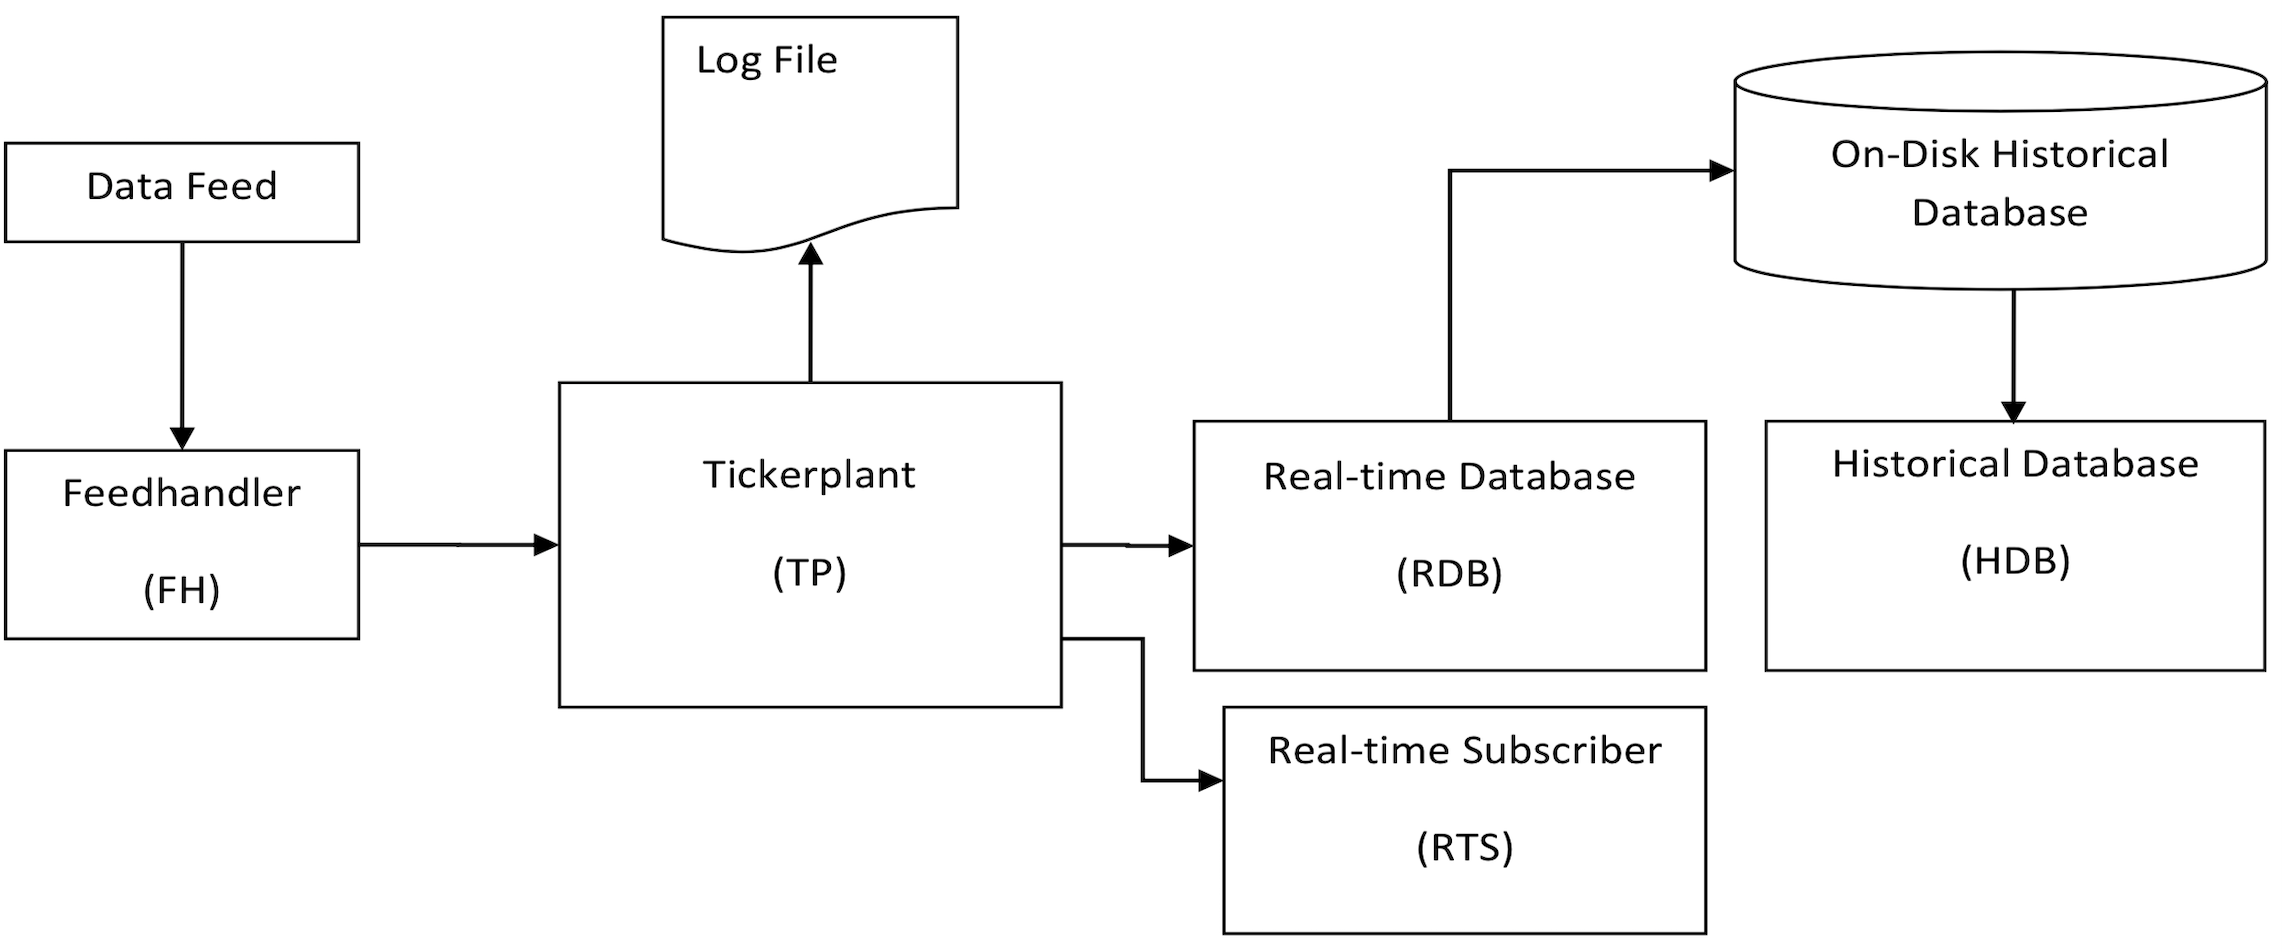

# Build their own custom real-time tick subscribers. 

* tickerplant process (tick.q)
    * simple behavior upon incoming updates – it simply inserts these records to the end of the corresponding table
    
* vanilla real-time subscriber process (r.q)
    * This vanilla real-time process subscribes to all tables and to all symbols on the tickerplant
    * more interesting functionality for example, the client may need to build or maintain their queries or analytics in real time. How would one take r.q and modify it to achieve said behavior? 
    
---------------

Real-time DataBase (RDB) and Real-Time Subscribers (RTS) sit downstream of the FeedHandler (FH) and TickerPlant (TP) processes.

The feedhandler feeds data into the tickerplant, which in turns publishes certain records to the real-time database and other real-time subscribers. Today’s data can be queried on the RDB. The historical data resides on disk and can be read into memory upon demand by the historical database process (HDB).

feedhandler receives this data and extracts the fields of interest. It will also perform some datatype casting and re-ordering of fields to normalize the data set with the corresponding table schemas present on the tickerplant. The feedhandler then pushes this massaged data to the tickerplant.

In [31]:
/ FeedHandler
syms:`MSFT.O`IBM.N`GS.N`BA.N`VOD.L
prices:syms!45.15 191.10 178.50 128.04 341.30
n:2
flag:1
getmovement:{[s] rand[0.0001]*prices[s]}
getprice:{[s] prices[s]+:rand[1 -1]*getmovement[s]; prices[s]}
getbid:{[s] prices[s]-getmovement[s]}
getask:{[s] prices[s]+getmovement[s]}
.z.ts:{
  s:n?syms;
  $[0<flag mod 10;
    h(".u.upd";`quote;(n#.z.N;s;getbid'[s];getask'[s];n?1000;n?1000)); 
    h(".u.upd";`trade;(n#.z.N;s;getprice'[s];n?1000))];
  flag+:1; }
\t 0

In [4]:
sum 0=2020 mod\: 4 100 400

1i


[0;31mCannot write to handle 100. OS reports: Bad file descriptor[0m: [0;31mCannot write to handle 100. OS reports: Bad file descriptor[0m